In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../csvs/shuffled_data.csv')
df

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,73,0,0,183,517,1,2,99,0,1.4,3,0.0,1
1,67,1,2,153,220,1,2,181,1,5.7,2,2.0,1
2,70,1,0,121,316,0,0,143,0,0.4,2,1.0,0
3,31,1,0,101,270,0,0,133,1,2.2,1,1.0,0
4,37,0,3,120,215,0,0,170,0,0.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,76,1,0,102,240,0,1,170,0,0.9,2,1.0,0
1299,73,1,0,143,351,1,2,174,1,1.8,2,3.0,1
1300,52,1,4,128,255,0,0,161,1,0.0,1,1.0,1
1301,67,0,1,190,297,1,2,133,0,1.6,2,1.0,1


In [3]:
y = df['target']
y

0       1
1       1
2       0
3       0
4       0
       ..
1298    0
1299    1
1300    1
1301    1
1302    0
Name: target, Length: 1303, dtype: int64

In [4]:
x = df.drop('target', axis=1)
x

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,73,0,0,183,517,1,2,99,0,1.4,3,0.0
1,67,1,2,153,220,1,2,181,1,5.7,2,2.0
2,70,1,0,121,316,0,0,143,0,0.4,2,1.0
3,31,1,0,101,270,0,0,133,1,2.2,1,1.0
4,37,0,3,120,215,0,0,170,0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,76,1,0,102,240,0,1,170,0,0.9,2,1.0
1299,73,1,0,143,351,1,2,174,1,1.8,2,3.0
1300,52,1,4,128,255,0,0,161,1,0.0,1,1.0
1301,67,0,1,190,297,1,2,133,0,1.6,2,1.0


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
def run(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    # print(f"{model} Accuracy: {accuracy:.4f}")
    return accuracy

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[7.394636015325678, 8.122605363984686, 7.931034482758621, 8.77394636015325, 8.965517241379318, 8.960153256704988, 9.033716475095785, 9.009578544061302, 8.953256704980841, 9.002298850574709, 8.964750957854404, 8.940229885057477, 8.93486590038314, 8.940229885057471, 8.92911877394636]
6


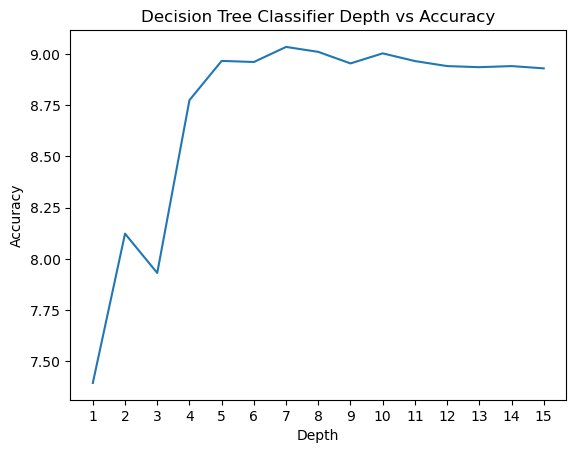

In [15]:
# just decision trees
# choose best max depth
depths = np.linspace(1, 15, 15).astype(int)
print(depths)
accuracies = [0]*15
for i, depth in enumerate(depths):
    acc_sum = 0
    for j in range(100):
        acc_sum += run(DecisionTreeClassifier(max_depth=depth))
    acc_score = acc_sum / 10
    accuracies[i] = acc_score
print(accuracies)
fig,ax = plt.subplots(1)
plt.xticks(depths)
plt.title("Decision Tree Classifier Depth vs Accuracy")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
ax.plot(depths, accuracies)
print(np.argmax(accuracies))
# most accurate max depth is 7


In [11]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
# visualization packages (pip install six pydotplus graphviz, conda install graphviz)
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

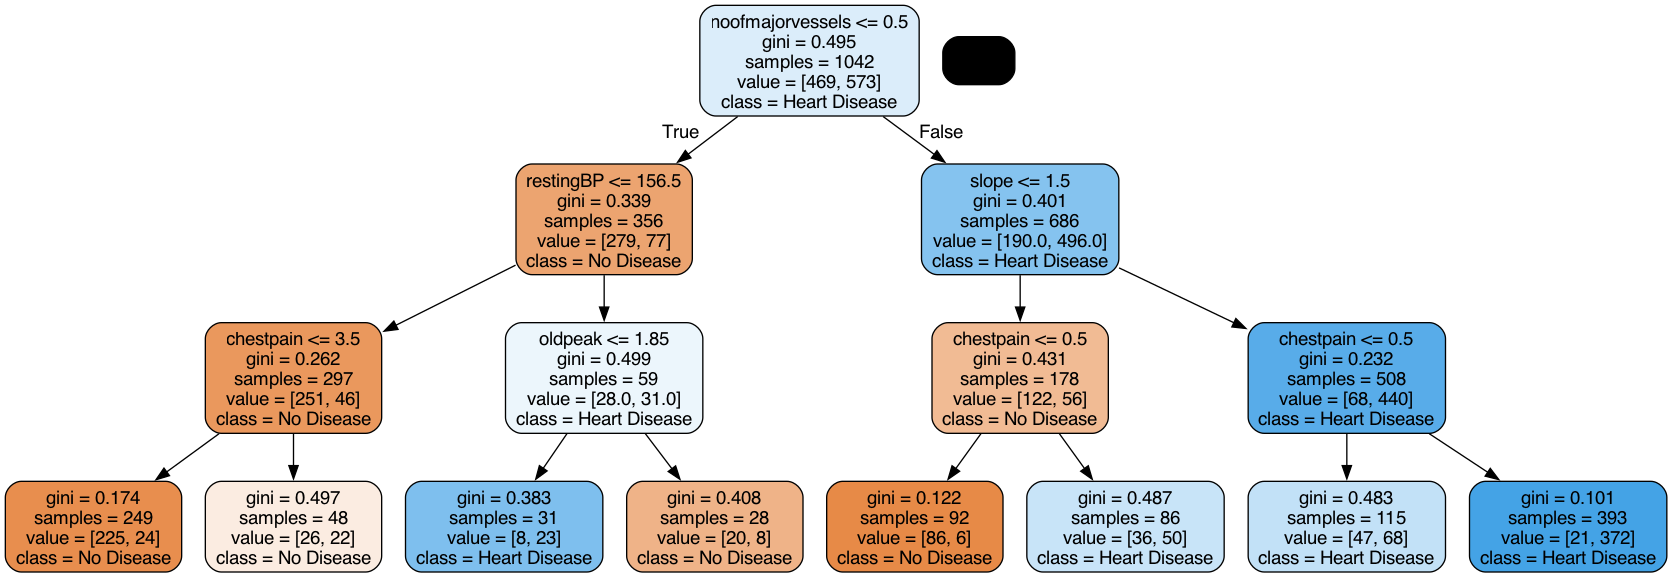

In [16]:
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=x.columns, 
                class_names=['No Disease', "Heart Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [14]:
def run(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model} Accuracy: {accuracy:.4f}")

In [15]:
models = [GaussianNB(), SVC(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), XGBClassifier(use_label_encoder=False, eval_metric='logloss')]

for i in models:
    run(i)

GaussianNB() Accuracy: 0.8467
SVC() Accuracy: 0.7395
LogisticRegression() Accuracy: 0.8352
DecisionTreeClassifier() Accuracy: 0.8812


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:33:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomForestClassifier() Accuracy: 0.9464
KNeighborsClassifier() Accuracy: 0.7433
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...) Accuracy: 0.9272
